# Customer Churn Data Set Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [17]:
def evaluation_metrics(test, pred):
    accuracy = accuracy_score(test, pred)
    precision, recall, fbeta, _ = precision_recall_fscore_support(test, 
                                                                  pred, 
                                                                  beta = 5, 
                                                                  pos_label = 1,      # default
                                                                  average = 'binary') # default
    
    return [precision, recall, fbeta, accuracy]
    

In [3]:
def resample(X_train, y_train):

    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state = 123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)

    print("Original \t:", np.unique(y_train, return_counts=True))
    print("SMOTE \t\t:", np.unique(y_smo, return_counts=True))
    print("UnderSampler \t:", np.unique(y_under, return_counts=True))

    return X_smo, y_smo, X_under, y_under

In [9]:
def plot_data_balancing(data):
    ax = data.value_counts().plot.bar(color=['green','blue'])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        
        xy = (p.get_x() + width/2, height)
        ax.annotate(f"{height} times",xy, va='bottom', ha='center', color='blue')
        ax.set_title("Check data balancing")
        ax.set_xticklabels(['No','Yes'])
        ax.set_ylabel("Counts")      

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/im_churn.csv', index_col=False)

In [5]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
0,27,70.55,1943.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,69,93.30,6398.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,55,59.20,3175.85,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,49,59.60,2970.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,72,109.55,7887.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tenure              6174 non-null   int64  
 1   MonthlyCharges      6174 non-null   float64
 2   TotalCharges        6174 non-null   float64
 3   Partner_0           6174 non-null   float64
 4   Partner_1           6174 non-null   float64
 5   Dependents_0        6174 non-null   float64
 6   Dependents_1        6174 non-null   float64
 7   PhoneService_0      6174 non-null   float64
 8   PhoneService_1      6174 non-null   float64
 9   MultipleLines_0     6174 non-null   float64
 10  MultipleLines_1     6174 non-null   float64
 11  MultipleLines_2     6174 non-null   float64
 12  InternetService_0   6174 non-null   float64
 13  InternetService_1   6174 non-null   float64
 14  InternetService_2   6174 non-null   float64
 15  OnlineSecurity_0    6174 non-null   float64
 16  Online

In [7]:
df.shape

(6174, 43)

In [8]:
df.shape[0] * df.shape[1]

265482

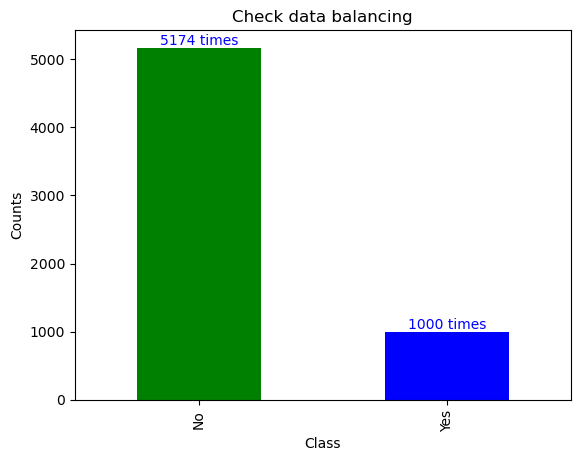

In [10]:
plot_data_balancing(df['Class'])

In [12]:
X = df.loc[:, df.columns != 'Class']
y = df[['Class']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([4139,  800]))

In [24]:
def train_models(X_train, X_test, y_train, y_test):
    LR = LogisticRegression(max_iter=1000).fit(X_train, y_train.values.ravel())
    DTC = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train.values.ravel())
    RFC = RandomForestClassifier(max_depth=5).fit(X_train, y_train.values.ravel())
    
    pred_lr = LR.predict(X_test)
    pred_dtc = DTC.predict(X_test)
    pred_rfc = RFC.predict(X_test)

    lr = {"Logistic Regression": evaluation_metrics(y_test, pred_lr)}
    dtc = {"Decision Tree": evaluation_metrics(y_test, pred_dtc)}
    rfc = {"Random Forest": evaluation_metrics(y_test, pred_rfc)}
    
    return lr

    # [precision, recall, fbeta, accuracy]
    # print()
    # print(f"Accuracy is: {accuracy:.2f}")
    # print(f"Precision is: {precision:.2f}")
    # print(f"Recall is: {recall:.2f}")
    # print(f"F1-score: {fbeta:.2f}")

    

In [39]:
lr = train_models(X_train, X_test, y_train, y_test)
lr


{'Logistic Regression': [0.6222222222222222,
  0.28,
  0.28605108055009826,
  0.8558704453441296]}

0.6222222222222222